### Data Analysis and Preprocessing

#### Importing Libraries

In [1]:
import sys
sys.path.append('../')
import pandas as pd
from src.utils import check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical, summarize_time
from src.plots import display_summary_table, plot_bar_charts,plot_time_series, plot_histograms, plot_categorical_numerical
import socket
import struct

#### Loading Data

In [2]:
df_creditcard = pd.read_csv('../data/creditcard.csv')
df_fraud = pd.read_csv('../data/Fraud_Data.csv')
df_ipaddress = pd.read_csv('../data/IpAddress_to_Country.csv')

In [3]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### Handle Missing Values

In [6]:
check_missing_data(df_creditcard)

'Success: No missing values.'

In [7]:
check_missing_data(df_fraud)

'Success: No missing values.'

In [8]:
check_missing_data(df_ipaddress)

'Success: No missing values.'

In [9]:
print(len(df_creditcard))

284807


In [10]:
print(len(df_fraud))

151112


In [11]:
print(len(df_ipaddress))

138846


#### Data Cleaning

In [12]:
df_creditcard = df_creditcard.drop_duplicates()

In [13]:
print(len(df_creditcard))

283726


In [14]:
df_fraud = df_fraud.drop_duplicates()

In [15]:
print(len(df_fraud))

151112


In [16]:
df_ipaddress = df_ipaddress.drop_duplicates()

In [17]:
print(len(df_ipaddress))

138846


In [18]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [19]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [20]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

In [21]:
df_fraud['device_id'] = df_fraud['device_id'].astype(str)
df_fraud['browser'] = df_fraud['browser'].astype(str)
df_fraud['age'] = df_fraud['age'].astype(int)
df_fraud['source'] = df_fraud['source'].astype(str)

In [22]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [23]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [24]:
df_ipaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Categorization

In [25]:
df_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
df_creditcard_num = df_creditcard[['Amount']]


In [27]:
df_creditcard_cat = df_creditcard[['Class']]

In [28]:
df_creditcard_time = df_creditcard[['Time']]

In [29]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [30]:
print(df_fraud.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


In [31]:
df_fraud_num = df_fraud[['purchase_value', 'age']]

In [32]:
df_fraud_cat = df_fraud[[ 'source', 'browser', 'sex', 'class']]

In [33]:
df_fraud_time = df_fraud[['signup_time', 'purchase_time']]

In [34]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [35]:
df_ipaddress_cat = df_ipaddress[['country']]

#### Exploratory Data Analysis

##### Univariate Analysis

In [36]:
fraud_cat_summary = summarize_categorical(df_fraud_cat)
display_summary_table(fraud_cat_summary)


source:
+----+----------+---------+
|    | source   |   count |
|----+----------+---------|
|  0 | SEO      |   60615 |
|  1 | Ads      |   59881 |
|  2 | Direct   |   30616 |
+----+----------+---------+

browser:
+----+-----------+---------+
|    | browser   |   count |
|----+-----------+---------|
|  0 | Chrome    |   61432 |
|  1 | IE        |   36727 |
|  2 | Safari    |   24667 |
|  3 | FireFox   |   24610 |
|  4 | Opera     |    3676 |
+----+-----------+---------+

sex:
+----+-------+---------+
|    | sex   |   count |
|----+-------+---------|
|  0 | M     |   88293 |
|  1 | F     |   62819 |
+----+-------+---------+

class:
+----+---------+---------+
|    |   class |   count |
|----+---------+---------|
|  0 |       0 |  136961 |
|  1 |       1 |   14151 |
+----+---------+---------+


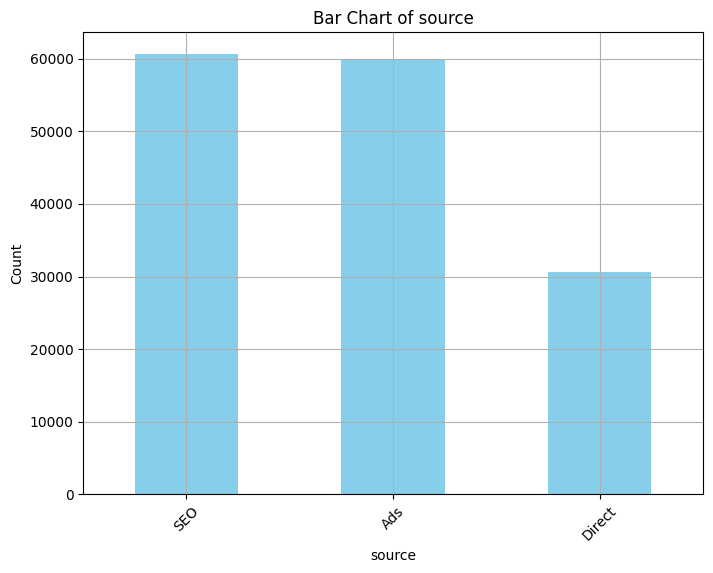

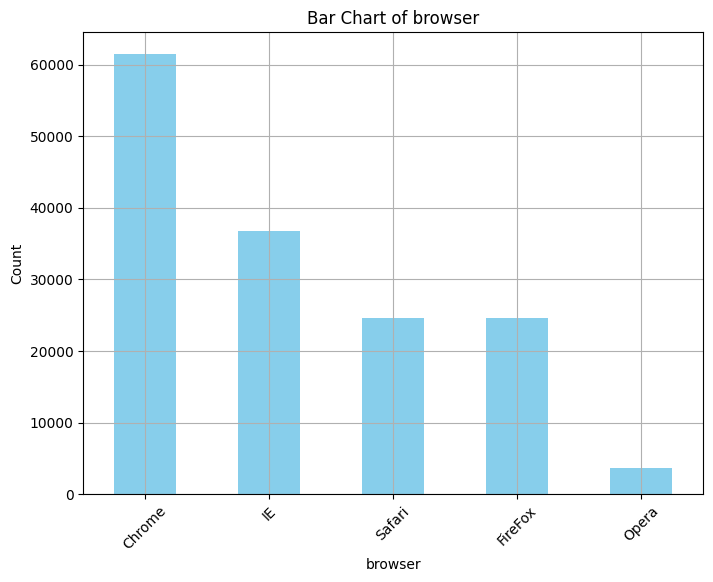

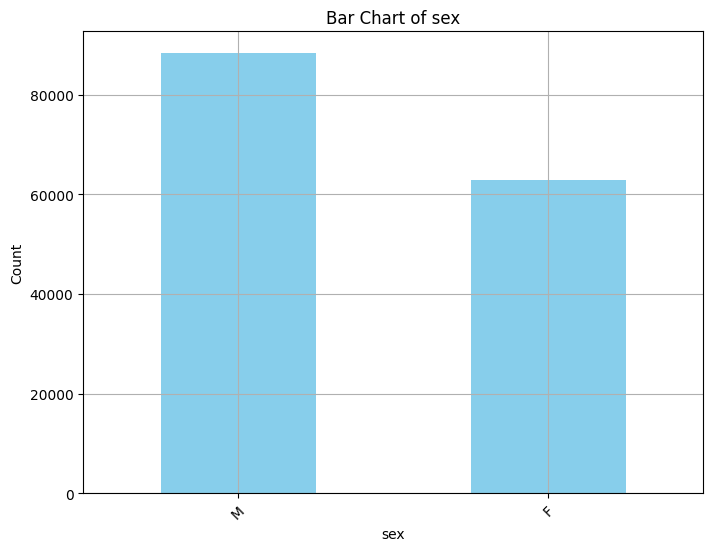

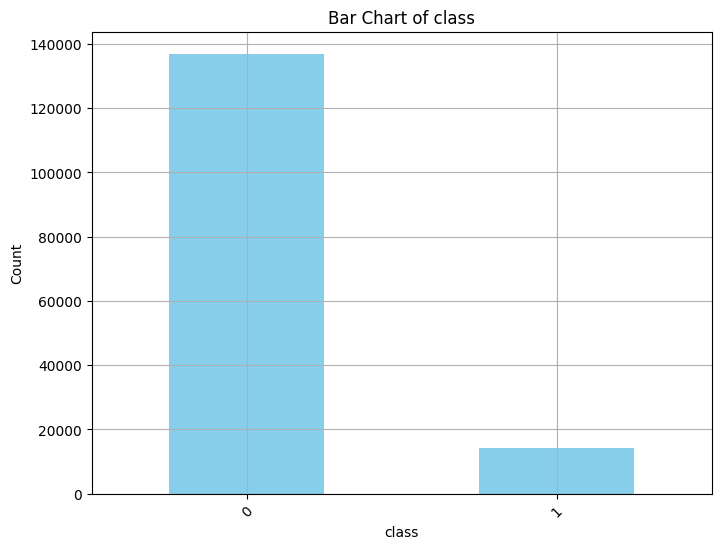

In [37]:
plot_bar_charts(df_fraud_cat)

In [38]:
fraud_num_desc = describe_numerical(df_fraud_num)
display_summary_table(fraud_num_desc)


purchase_value:
+----+---------+------------------+
|    | index   |   purchase_value |
|----+---------+------------------|
|  0 | count   |      151112      |
|  1 | mean    |          36.9354 |
|  2 | std     |          18.3228 |
|  3 | min     |           9      |
|  4 | 25%     |          22      |
|  5 | 50%     |          35      |
|  6 | 75%     |          49      |
|  7 | max     |         154      |
+----+---------+------------------+

age:
+----+---------+--------------+
|    | index   |          age |
|----+---------+--------------|
|  0 | count   | 151112       |
|  1 | mean    |     33.1407  |
|  2 | std     |      8.61773 |
|  3 | min     |     18       |
|  4 | 25%     |     27       |
|  5 | 50%     |     33       |
|  6 | 75%     |     39       |
|  7 | max     |     76       |
+----+---------+--------------+


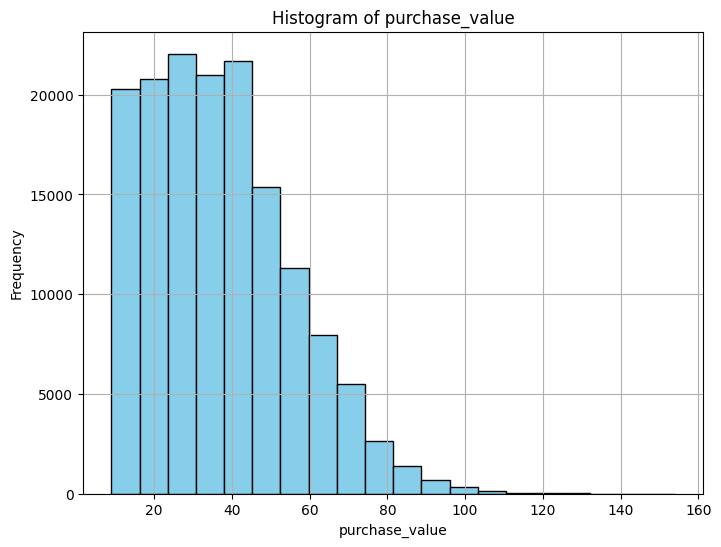

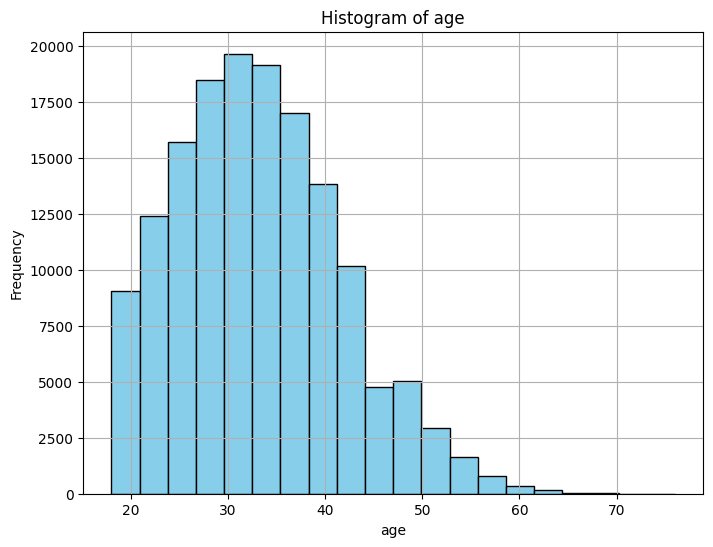

In [39]:
plot_histograms(df_fraud_num)

In [40]:
df_creditcard_cat.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [41]:
creditcard_cat_summary = summarize_categorical(df_creditcard_cat)
display_summary_table(creditcard_cat_summary)


Class:
+----+---------+---------+
|    |   Class |   count |
|----+---------+---------|
|  0 |       0 |  283253 |
|  1 |       1 |     473 |
+----+---------+---------+


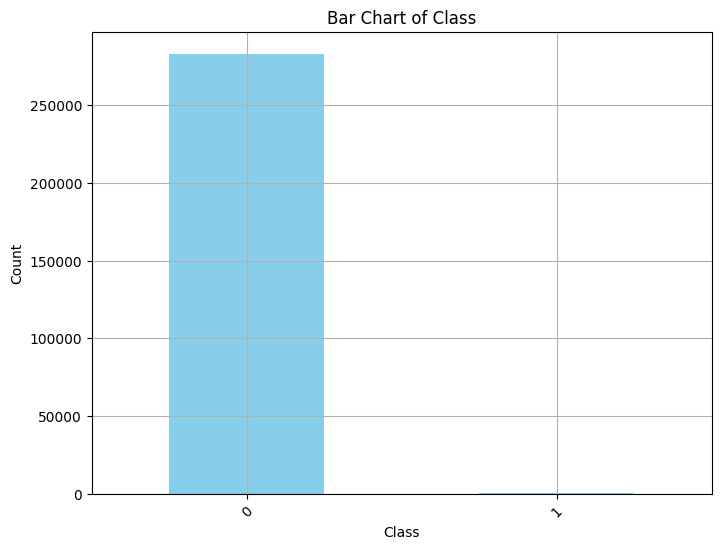

In [42]:
plot_bar_charts(df_creditcard_cat)

In [43]:
df_creditcard_num.head()

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99


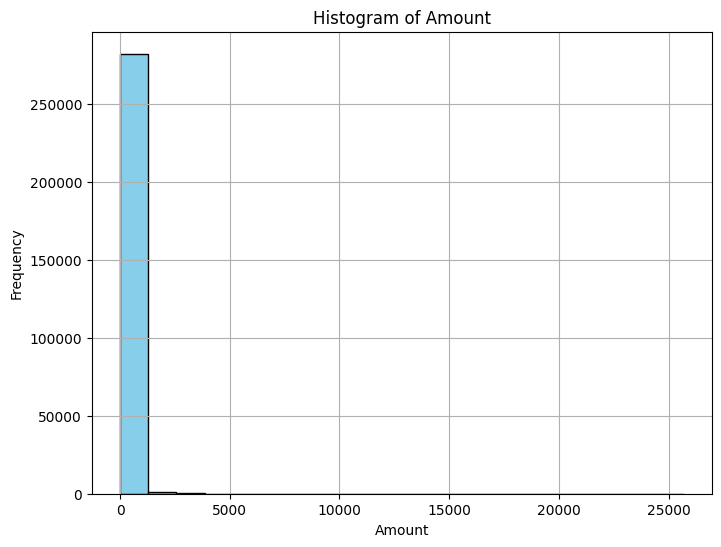

In [44]:
plot_histograms(df_creditcard_num)

In [45]:
df_ipaddress_cat.head()
print(df_ipaddress_cat.columns)

Index(['country'], dtype='object')


In [46]:
ipaddress_cat_summary = summarize_categorical(df_ipaddress_cat)
display_summary_table(ipaddress_cat_summary)


country:
+-----+---------------------------------------+---------+
|     | country                               |   count |
|-----+---------------------------------------+---------|
|   0 | United States                         |   46868 |
|   1 | Canada                                |    6989 |
|   2 | Russian Federation                    |    6739 |
|   3 | Australia                             |    6316 |
|   4 | Germany                               |    5999 |
|   5 | United Kingdom                        |    5401 |
|   6 | Brazil                                |    4885 |
|   7 | China                                 |    3725 |
|   8 | Poland                                |    3042 |
|   9 | Japan                                 |    3005 |
|  10 | Ukraine                               |    2903 |
|  11 | France                                |    2892 |
|  12 | Netherlands                           |    2509 |
|  13 | Switzerland                           |    1821 |
|  1

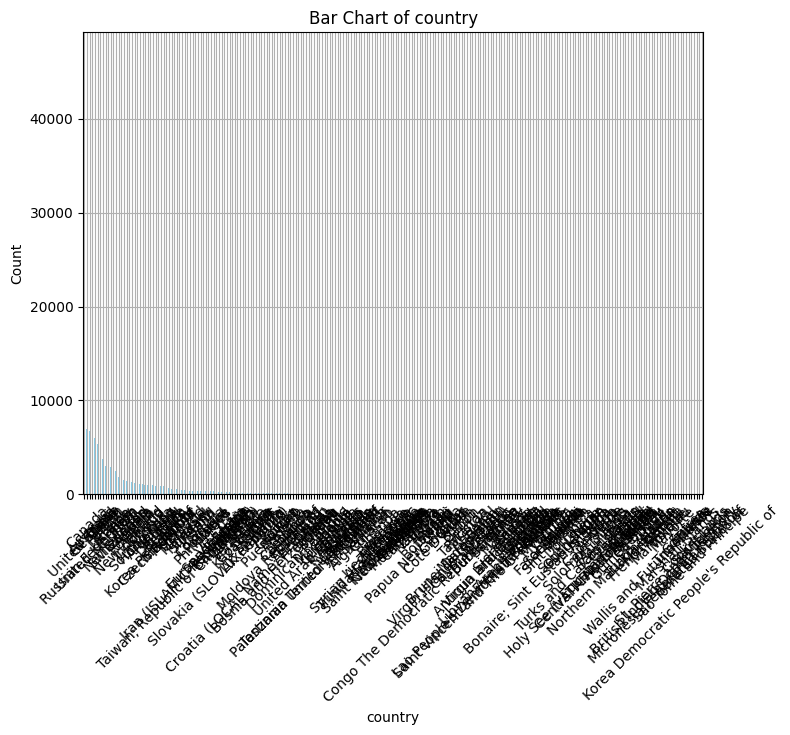

In [47]:
plot_bar_charts(df_ipaddress_cat)

##### Bivariate analysis

In [48]:
summarize_time(df_fraud, 'purchase_time')

Number of Unique Dates: 150679
Start Date: 2015-01-01 00:00:44
End Date: 2015-12-16 02:56:05


In [49]:
summarize_time(df_fraud, 'signup_time')

Number of Unique Dates: 151112
Start Date: 2015-01-01 00:00:42
End Date: 2015-08-18 04:40:29


In [50]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


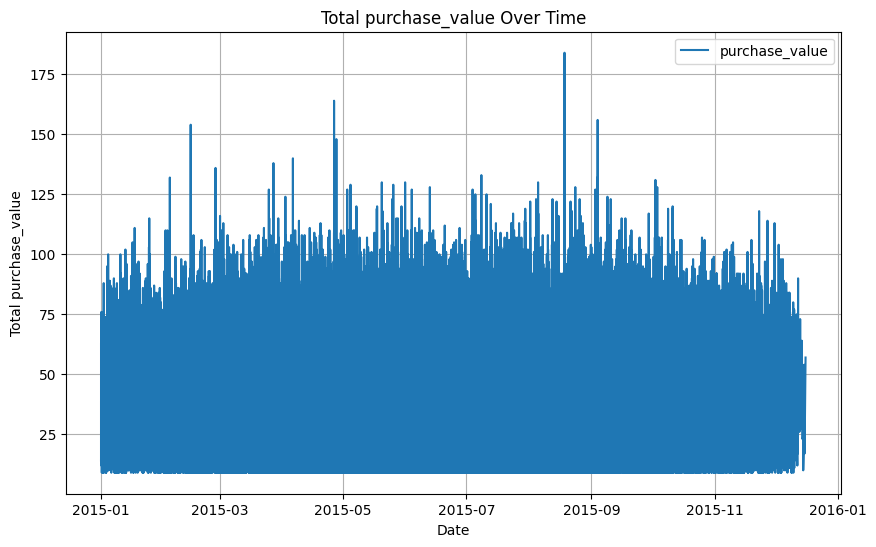

In [51]:
plot_time_series(df_fraud, 'purchase_time', 'purchase_value')

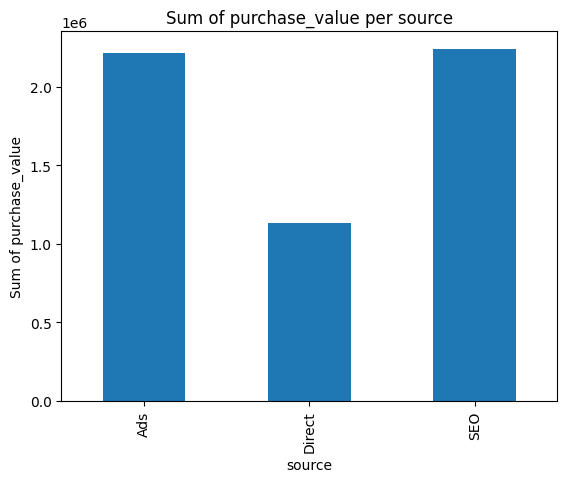

In [52]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'source')

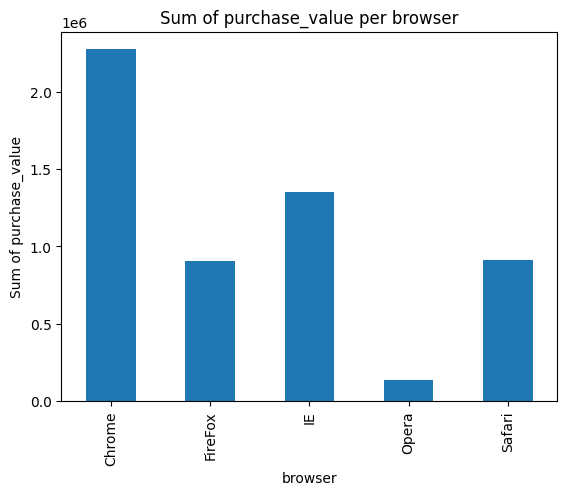

In [53]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'browser')

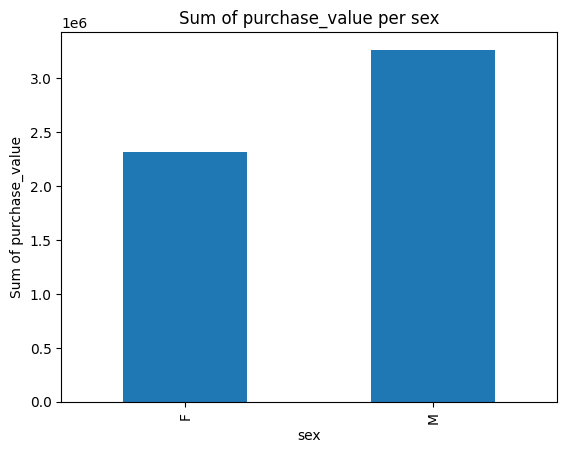

In [54]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'sex')

#### Merge Datesets

In [55]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [59]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


In [56]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [57]:
# Function to convert IP address to integer
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [60]:
df_ipaddress['lower_bound_ip_address'] = df_ipaddress['lower_bound_ip_address'].astype(int)
df_ipaddress['upper_bound_ip_address'] = df_ipaddress['upper_bound_ip_address'].astype(int)
df_fraud['ip_address'] = df_fraud['ip_address'].astype(int)

In [61]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


In [62]:
df_ipaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [63]:
print(len(df_fraud))

151112


In [64]:
print(len(df_ipaddress))

138846


In [69]:
for i, row in df_fraud.iterrows():
    # Find the matching row in df_ipaddress
    matched_row = df_ipaddress[(df_ipaddress['lower_bound_ip_address'] <= row['ip_address']) & (df_ipaddress['upper_bound_ip_address'] >= row['ip_address'])]
    
    # If a match was found, merge the country information
    if not matched_row.empty:
        df_fraud.at[i, 'country'] = matched_row['country'].values[0]

In [70]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United Kingdom


In [71]:
check_missing_data(df_fraud)

,Column Name,Missing Values,Percentage Missing
11,country,21966,14.536238


In [73]:
#Clean data
df_fraud['country'] = df_fraud['country'].fillna('Unknown')

In [74]:
check_missing_data(df_fraud)

'Success: No missing values.'

#### Feature Engineering 

In [75]:
print(df_fraud.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')


In [76]:
# Transaction frequency
df_fraud['transaction_frequency'] = df_fraud.groupby('user_id')['user_id'].transform('count')

In [78]:
# Transaction velocity
df_fraud['transaction_velocity'] = df_fraud.groupby('user_id')['purchase_time'].transform(lambda x: x.max() - x.min())

In [80]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   user_id                151112 non-null  int64          
 1   signup_time            151112 non-null  datetime64[ns] 
 2   purchase_time          151112 non-null  datetime64[ns] 
 3   purchase_value         151112 non-null  int64          
 4   device_id              151112 non-null  object         
 5   source                 151112 non-null  object         
 6   browser                151112 non-null  object         
 7   sex                    151112 non-null  object         
 8   age                    151112 non-null  int64          
 9   ip_address             151112 non-null  int64          
 10  class                  151112 non-null  int64          
 11  country                151112 non-null  object         
 12  transaction_frequency  151112 

In [81]:
# Extract hour of day and day of week from 'signup_time' and 'purchase_time'
df_fraud['signup_hour_of_day'] = df_fraud['signup_time'].dt.hour
df_fraud['signup_day_of_week'] = df_fraud['signup_time'].dt.dayofweek

df_fraud['purchase_hour_of_day'] = df_fraud['purchase_time'].dt.hour
df_fraud['purchase_day_of_week'] = df_fraud['purchase_time'].dt.dayofweek

In [82]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,0 days,22,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0 days,20,6,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,1,0 days,18,3,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,Unknown,1,0 days,21,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United Kingdom,1,0 days,7,1,18,2
